# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [73]:
sinasc = pd.read_csv('b1abb33c4f.csv')
print(sinasc.shape)
print(sinasc.drop_duplicates().shape)
# Não há duplicados
sinasc.head()

(27028, 69)
(27028, 69)


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

In [ ]:
#Construindo dataframes com as frequencias das variaveis a serem utilizadas
count_apgar1 = pd.DataFrame(sinasc['APGAR1'].value_counts())
count_apgar5 = pd.DataFrame(sinasc['APGAR5'].value_counts())
count_sexo = pd.DataFrame(sinasc['SEXO'].value_counts())
count_gestacao = pd.DataFrame(sinasc['GESTACAO'].value_counts())

In [ ]:
#criando categoria para o ESTCIVMAE
sinasc.loc[sinasc['ESTCIVMAE'] == 1, 'cat_estcivmae'] = 'Solteira'
sinasc.loc[sinasc['ESTCIVMAE'] == 2, 'cat_estcivmae'] = 'Casada'
sinasc.loc[sinasc['ESTCIVMAE'] == 3, 'cat_estcivmae'] = 'Viúva'
sinasc.loc[sinasc['ESTCIVMAE'] == 4, 'cat_estcivmae'] = 'Separada/Divorciada'
sinasc.loc[sinasc['ESTCIVMAE'] == 9, 'cat_estcivmae'] = 'Ignorado'
count_estcivmae = pd.DataFrame(sinasc['cat_estcivmae'].value_counts())
count_estcivmae

<IPython.core.display.Javascript object>


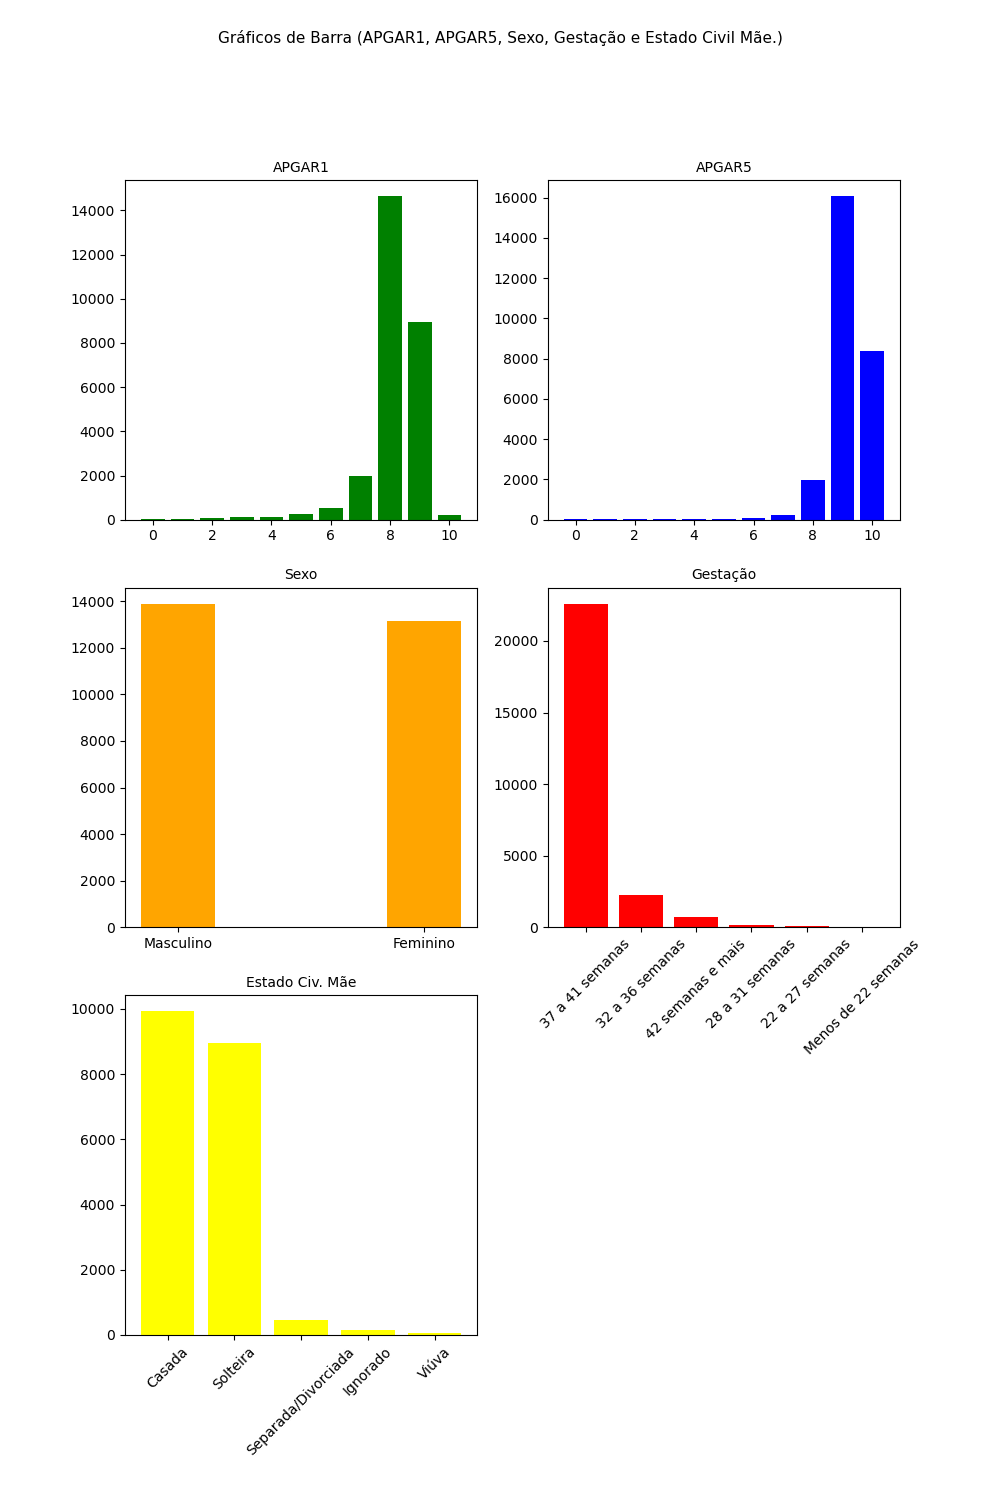

In [187]:


plt.figure(figsize = (10, 15))

plt.suptitle('Gráficos de Barra (APGAR1, APGAR5, Sexo, Gestação e Estado Civil Mãe.)', fontsize = 11)

plt.subplot(3, 2, 1)
plt.title('APGAR1', fontsize = 10)
plt.bar(count_apgar1.index,count_apgar1['APGAR1'], color='green')

plt.subplot(3, 2, 2)
plt.title('APGAR5', fontsize = 10)
plt.bar(count_apgar5.index,count_apgar5['APGAR5'], color='blue')

plt.subplot(3, 2, 3)
plt.title('Sexo', fontsize = 10)
plt.bar(count_sexo.index,count_sexo['SEXO'],width = 0.3, color='orange')

plt.subplot(3, 2, 4)
plt.title('Gestação', fontsize = 10)
plt.bar(count_gestacao.index,count_gestacao['GESTACAO'], color='red')
plt.tick_params(axis="x", rotation = 45)


plt.subplot(3, 2, 5)
plt.title('Estado Civ. Mãe', fontsize = 10)
plt.bar(count_estcivmae.index,count_estcivmae['cat_estcivmae'], color='yellow')
plt.tick_params(axis="x", rotation = 45)

plt.show()

#ax.bar(count_apgar1.index,count_apgar1['APGAR1'])
#
#
#ax.tick_params(axis="x", rotation = 30)
#
#plt.show()
#

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

<IPython.core.display.Javascript object>


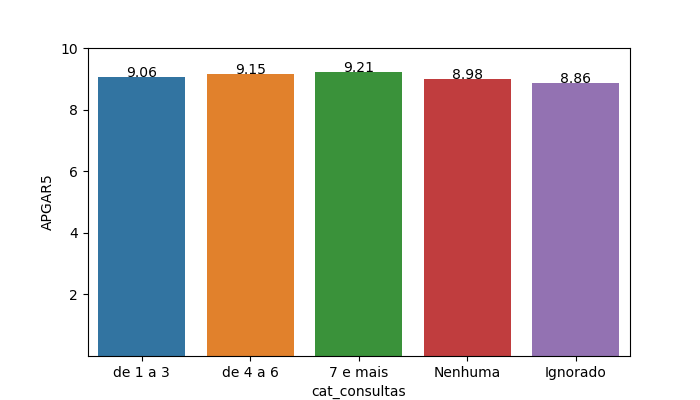

In [249]:
sinasc_apgar = pd.DataFrame(sinasc[['CONSULTAS','APGAR5']])
sinasc_apgar.loc[sinasc_apgar['CONSULTAS'] == 1, 'cat_consultas'] = 'Nenhuma'
sinasc_apgar.loc[sinasc_apgar['CONSULTAS'] == 2, 'cat_consultas'] = 'de 1 a 3'
sinasc_apgar.loc[sinasc_apgar['CONSULTAS'] == 3, 'cat_consultas'] = 'de 4 a 6'
sinasc_apgar.loc[sinasc_apgar['CONSULTAS'] == 4, 'cat_consultas'] = '7 e mais'
sinasc_apgar.loc[sinasc_apgar['CONSULTAS'] == 9, 'cat_consultas'] = 'Ignorado'
plt.close('all')
plt.rc('figure', figsize=(7, 4))
fig, axes = plt.subplots(1, 1)

bar = sns.barplot(x='cat_consultas', y='APGAR5', ci = None , 
            order= ['de 1 a 3','de 4 a 6','7 e mais','Nenhuma','Ignorado'], 
            data=sinasc_apgar)
plt.yticks([2, 4, 6, 8 ,10])


for i in bar.patches:
    bar.annotate(format(i.get_height(),'.2f'),
                 (i.get_x()+i.get_width()/2, i.get_height()),
                 ha='center',va='baseline', fontsize=10)


####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

<IPython.core.display.Javascript object>


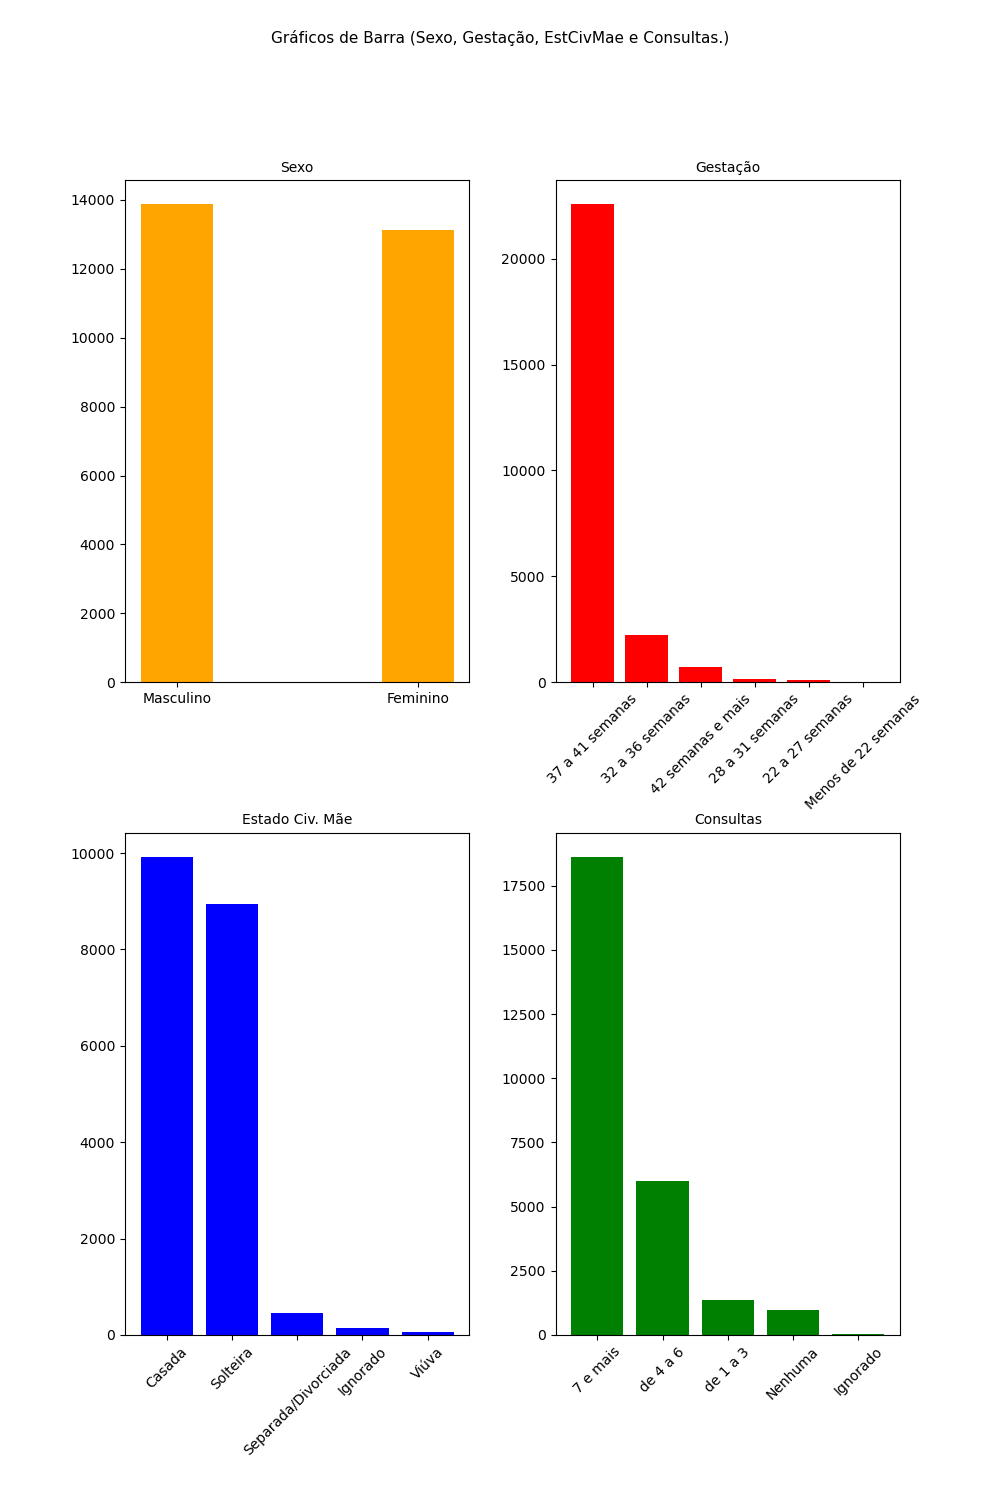

In [269]:
count_consultas = pd.DataFrame(sinasc_apgar['cat_consultas'].value_counts())

plt.close('all')

plt.figure(figsize = (10, 15))

plt.suptitle('Gráficos de Barra (Sexo, Gestação, EstCivMae e Consultas.)', fontsize = 11)

plt.subplot(2, 2, 1)
plt.title('Sexo', fontsize = 10)
plt.bar(count_sexo.index,count_sexo['SEXO'],width = 0.3, color='orange')

plt.subplot(2, 2, 2)
plt.title('Gestação', fontsize = 10)
plt.bar(count_gestacao.index,count_gestacao['GESTACAO'], color='red')
plt.tick_params(axis="x", rotation = 45)

plt.subplot(2, 2, 3)
plt.title('Estado Civ. Mãe', fontsize = 10)
plt.bar(count_estcivmae.index,count_estcivmae['cat_estcivmae'], color='blue')
plt.tick_params(axis="x", rotation = 45)

plt.subplot(2, 2, 4)
plt.title('Consultas', fontsize = 10)
plt.bar(count_consultas.index,count_consultas['cat_consultas'], color='green')
plt.tick_params(axis="x", rotation = 45)

plt.subplots_adjust(wspace=0.25, hspace=0.3)

plt.show()